In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn3_circles

In [2]:
cell_dict = {'B-cell_naive': 'NB',
                'NK-cell_naive': 'NK',
                'monocyte_naive': 'CM', 
                'CD4_T-cell_naive': 'CD4N',
                'CD8_T-cell_naive': 'CD8N'}

In [3]:
os.chdir('/mnt/BioHome/jreyna/jreyna/projects/dchallenge/')

In [4]:
outdir = 'results/notebooks/gene_list_comparison/v2/'
os.makedirs(outdir, exist_ok=True)

In [5]:
finemap_dir = 'results/main/Intersect_T1D_Finemap_GWAS_SNPs_with_HiChIP/'
coloc_dir = 'results/notebooks/colocalization_with_eqtl_catalogue/'
pieqtl_dir = 'results/notebooks/Intersect_PieQTLs_with_T1D_Significant_GWAS_SNPs/'

### Loading the GENCODE

In [6]:
gencode = pd.read_table('results/refs/gencode/v30/gencode.v30.annotation.bed', header=None)
gencode = gencode.iloc[:, [5,6]]
gencode.set_index(6, inplace=True)
gencode = gencode.squeeze()
gencode = gencode.to_dict()
gencode.update({v:k for k,v in gencode.items()})

### Loading the data

In [7]:
join_fn = os.path.join(outdir, 'Unique_Genes_And_SNPs.xlsx')
writer = pd.ExcelWriter(join_fn, engine='xlsxwriter')

In [33]:
# finemapping
finemap_summary = os.path.join(finemap_dir, 'Unique_Counts_By_Cell_Line.xlsx')
finemap_summary = pd.read_excel(finemap_summary)
finemap_summary.columns = ['Cell Line', 'SNPs', 'Genes']
finemap_summary.sort_values(['Cell Line'], inplace=True)

# colocalization 
coloc_summary = os.path.join(coloc_dir, 'Unique_Counts_By_Cell_Line.xlsx')
coloc_summary = pd.read_excel(coloc_summary)
coloc_summary.columns = ['Cell Line', 'SNPs', 'Genes']
coloc_summary.loc[:, 'Cell Line'] = coloc_summary.loc[:, 'Cell Line'].map(cell_dict)

# pieqtls
pieqtls_summary = os.path.join(pieqtl_dir, 'Unique_Counts_By_Cell_Line.xlsx')
# 'results/notebooks/Intersect_PieQTLs_with_T1D_Significant_GWAS_SNPs/Unique_Counts_By_Cell_Line.xlsx'
pieqtls_summary = pd.read_excel(pieqtls_summary)
pieqtls_summary.columns = ['Cell Line', 'SNPs', 'Genes']
pieqtls_summary.loc[:, 'Cell Line'] = pieqtls_summary.loc[:, 'Cell Line'].map(cell_dict)

In [34]:
finemap_summary.to_excel(writer, index=False, sheet_name='finemapping')
coloc_summary.to_excel(writer, index=False, sheet_name='colocalization')
pieqtls_summary.to_excel(writer, index=False, sheet_name='pieqtls')

In [35]:
writer.save()

/mnt/BioHome/jreyna/software/anaconda3/hichip-db/lib/python3.10/site-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [36]:
finemap_summary

,Cell Line,SNPs,Genes
0,CD4N,41,65
1,CD8N,29,40
2,CM,30,35
3,NB,37,62
4,NK,51,68


In [37]:
coloc_summary

,Cell Line,SNPs,Genes
0,NB,3,3
1,CD4N,1,1
2,CD8N,2,2
3,NK,3,3
4,CM,2,2


In [38]:
pieqtls_summary

,Cell Line,SNPs,Genes
0,NB,348,39
1,CD4N,322,33
2,CD8N,269,35
3,NK,319,45
4,CM,116,25


### Making the venn diagram

In [54]:
finemap_genes = os.path.join(finemap_dir, 'gene_list.txt')
finemap_genes = pd.read_table(finemap_genes, header=None).squeeze('columns').tolist()

In [55]:
coloc_genes = os.path.join(coloc_dir, 'gene_list.txt')
coloc_genes = pd.read_table(coloc_genes, header=None).squeeze('columns').tolist()

In [56]:
pieqtls_genes = os.path.join(pieqtl_dir, 'gene_list.txt')
pieqtls_genes = pd.read_table(pieqtls_genes, header=None).squeeze('columns').tolist()

In [57]:
len(pieqtls_genes)

91

In [58]:
len(finemap_genes)

161

In [59]:
len(coloc_genes)

9

In [60]:
finemap_label = 'Finemapped-SNPs\n+ Loops'
coloc_label = 'Colocalization\nOnly'
pieqtl_label = 'pieQTL-Linked \n+ Sig.GWAS'

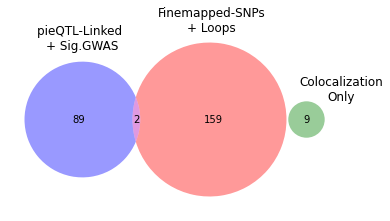

In [66]:
fig, ax = plt.subplots()
vn = venn3([set(finemap_genes), set(coloc_genes), set(pieqtls_genes)], set_labels=[finemap_label,
                                                                             coloc_label,
                                                                             pieqtl_label])
a = vn.get_label_by_id('A')
a.set_position((0.25, 0.65))

b = vn.get_label_by_id('B')
b.set_position((1, 0.25))

c = vn.get_label_by_id('C')
c.set_position((-0.5, 0.55))

fn = os.path.join(outdir, 'threeway_comparison.png')
fig.savefig(fn, dpi=600)

In [19]:
len(set(finemap_genes + coloc_genes + pieqtls_genes))

259

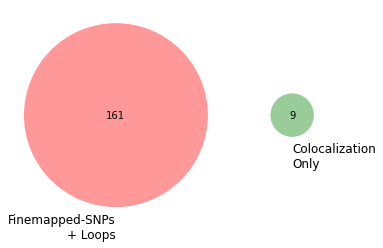

In [20]:
fig, ax = plt.subplots()
venn2([set(finemap_genes), set(coloc_genes)], set_labels=[finemap_label,
                                                          coloc_label])
fn = os.path.join(outdir, 'two_comparison.finemap.coloc.png')
fig.savefig(fn, dpi=600)

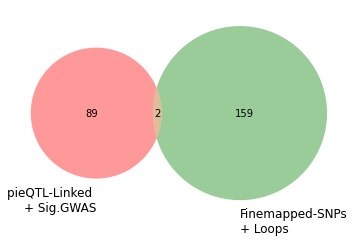

In [21]:
fig, ax = plt.subplots()

venn2([set(pieqtls_genes), set(finemap_genes)], set_labels=[pieqtl_label, finemap_label])

fn = os.path.join(outdir, 'two_comparison.finemap.pieqtl.png')
fig.savefig(fn, dpi=600)

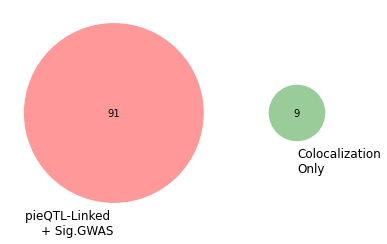

In [22]:
fig, ax = plt.subplots()

venn2([set(pieqtls_genes), set(coloc_genes)], set_labels=[pieqtl_label, coloc_label])

fn = os.path.join(outdir, 'two_comparison.coloc.pieqtl.png')
fig.savefig(fn, dpi=600)

## Compiling the gene lists

In [23]:
major_cells = ['B-cell_naive', 'CD4_T-cell_naive',
               'CD8_T-cell_naive', 'NK-cell_naive','monocyte_naive', 
               'CD4N', 'CD8N', 'CM', 'NB', 'NK']

In [24]:
finemap_genes = os.path.join(finemap_dir, 'genes_by_cell.xlsx')
finemap_genes = pd.read_excel(finemap_genes)

pieqtl_genes = os.path.join(pieqtl_dir, 'genes_by_cell.xlsx')
pieqtl_genes = pd.read_excel(pieqtl_genes)
pieqtl_genes.loc[:, 'cline'] = pieqtl_genes['cline'].apply(lambda x: cell_dict[x])

coloc_genes = os.path.join(coloc_dir, 'genes_by_cell.xlsx')
coloc_genes = pd.read_excel(coloc_genes)
coloc_genes.loc[:, 'cline'] = coloc_genes['cline'].apply(lambda x: cell_dict[x])

In [25]:
compiled = pd.concat([finemap_genes, pieqtl_genes, coloc_genes], axis=0)
compiled = compiled.loc[compiled.cline.isin(major_cells)]

def geneid_to_genename(x):
    if x in gencode:
        return(gencode[x])
    else:
        return(x)
compiled.loc[:, 'genename'] = compiled['geneid'].apply(geneid_to_genename)

In [26]:
compiled

,cline,geneid,source,genename
0,CD4N,ENSG00000066044,finemap_with_hichip,ELAVL1
1,CD4N,ENSG00000082074,finemap_with_hichip,FYB1
2,CD4N,ENSG00000083807,finemap_with_hichip,SLC27A5
3,CD4N,ENSG00000089022,finemap_with_hichip,MAPKAPK5
4,CD4N,ENSG00000100065,finemap_with_hichip,CARD10
...,...,...,...,...
6,NK,ENSG00000197728,colocalization,RPS26
7,NK,ENSG00000226455,colocalization,AL121787.1
8,NK,ENSG00000286116,colocalization,AL157394.2
9,CM,ENSG00000065675,colocalization,PRKCQ


In [27]:
compiled = compiled.iloc[:, [2,0,3,1]]

In [28]:
compiled 

,source,cline,genename,geneid
0,finemap_with_hichip,CD4N,ELAVL1,ENSG00000066044
1,finemap_with_hichip,CD4N,FYB1,ENSG00000082074
2,finemap_with_hichip,CD4N,SLC27A5,ENSG00000083807
3,finemap_with_hichip,CD4N,MAPKAPK5,ENSG00000089022
4,finemap_with_hichip,CD4N,CARD10,ENSG00000100065
...,...,...,...,...
6,colocalization,NK,RPS26,ENSG00000197728
7,colocalization,NK,AL121787.1,ENSG00000226455
8,colocalization,NK,AL157394.2,ENSG00000286116
9,colocalization,CM,PRKCQ,ENSG00000065675


In [29]:
compiled.groupby('source').geneid.nunique().to_frame()

,geneid
source,
colocalization,9
finemap_with_hichip,161
pieqtls_with_sig_gwas,91


In [30]:
compiled.geneid.nunique()

259

In [31]:
compiled_fn = os.path.join(outdir, 'Compiled_Gene_Lists.xlsx')
compiled.to_excel(compiled_fn, index=False)

In [69]:
compiled.source.unique()

array(['finemap_with_hichip', 'pieqtls_with_sig_gwas', 'colocalization'],
      dtype=object)

In [79]:
pd.options.display.min_rows = 100

In [80]:
pie = compiled.loc[compiled['source'] == 'pieqtls_with_sig_gwas']
shared_genes = pie.groupby('geneid').cline.nunique()
shared_genes.sort_values(ascending=False).to_frame()

,cline
geneid,
ENSG00000137312,5
ENSG00000272221,5
ENSG00000206344,5
ENSG00000204536,5
ENSG00000186470,5
ENSG00000204520,5
ENSG00000204351,5
ENSG00000026950,5
ENSG00000204618,4


In [81]:
shared_cells = pie.groupby('cline').geneid.nunique()
shared_cells.sort_values(ascending=False).to_frame()

,geneid
cline,
NK,45
NB,39
CD8N,35
CD4N,33
CM,25
